# 一、前期准备


安装必要的环境

## 1. 首先安装paddlehub

In [1]:
pip install paddlehub

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
You should consider upgrading via the '/opt/conda/envs/python35-paddle120-env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## 2. 安装人脸关键点检测模型

In [2]:
!hub install face_landmark_localization==1.0.2

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def convert_to_list(value, n, name, dtype=np.int):
loader.cpp:81 can't find library libcuda.so.418.67


# **二、测试一下人脸检测的效果**

In [ ]:
import paddlehub as hub
import cv2
face_landmark = hub.Module(name="face_landmark_localization")
result = face_landmark.keypoint_detection(images=[cv2.imread('data/test2.jpg')] ,batch_size=1,use_gpu=False,output_dir='work',visualization=True)


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def convert_to_list(value, n, name, dtype=np.int):


把检测后的图显示一下，emmm，还不错。

<Figure size 432x288 with 0 Axes>

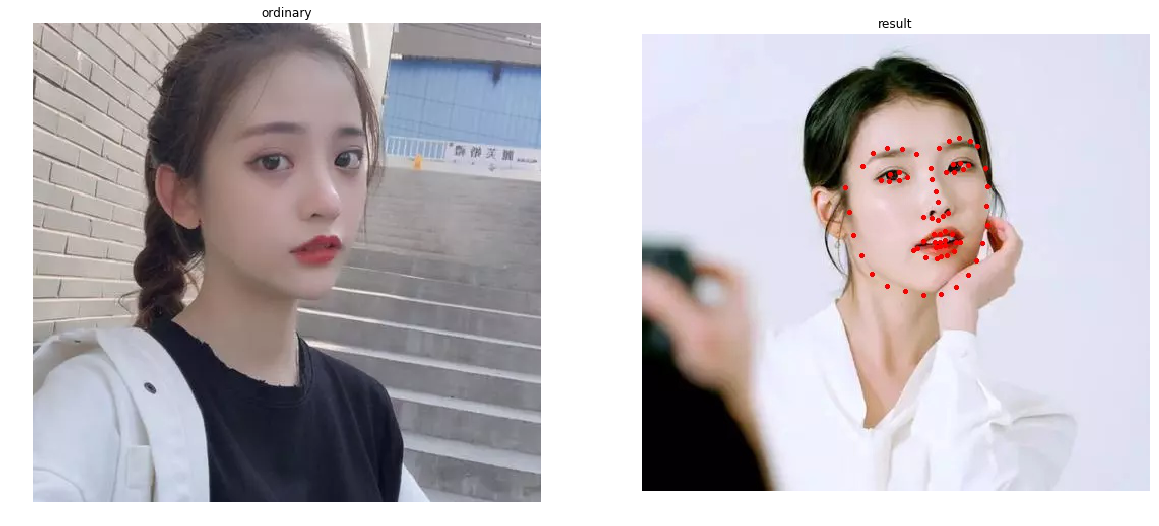

In [2]:
import matplotlib.pyplot as plt
#显示原图
img_path='work/1.jpg' 
img1=plt.imread(img_path)
#显示预测的结果图
result_img_path='work/ndarray_1618148212.5413501.jpg'
img2 = plt.imread(result_img_path) 
# 展示图片
plt.suptitle('Multi_Image')
plt.figure(figsize=(20,10))
plt.subplot(1,2,1), plt.title('ordinary')
plt.imshow(img1) ,plt.axis('off')
plt.subplot(1,2,2), plt.title('result')
plt.imshow(img2) ,plt.axis('off')
plt.show()

# 三、检测疲劳


## 3.1眨眼检测
  **先来个处理静态照片版本的**
  
  
	  
基本原理：当人眼睁开时，ear在某个值上下波动，当人眼闭合时，ear迅速下降，理论上会接近于零，当时人脸检测模型还没有这么精确。所以我们认为当ear低于某个阈值时，眼睛处于闭合状态。
 
 
 







 
 ![](https://ai-studio-static-online.cdn.bcebos.com/028585b0557d4b11860faf9c6ab7ff0506f52484a7364a2bacdbde378c6b7ee4)
 ![](https://ai-studio-static-online.cdn.bcebos.com/9b0f03a314eb4b528a9bd948e960cf69d94d3237a7e8468fb8536d2a37b38cd9)
 

**人脸关键点坐标示意图**











![](https://ai-studio-static-online.cdn.bcebos.com/43eb41c3e2314eca99b3795973d11d355787f6e73b4448569037b525d7559487)
 

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import paddlehub as hub

face_landmark = hub.Module(name="face_landmark_localization")
result= face_landmark.keypoint_detection(images=[cv2.imread('work/1.jpg')],use_gpu=False)
face_landmark=result[0]['data'][0]

#左眼纵线坐标
l1=(np.array(face_landmark[39])+np.array(face_landmark[38]))/2
l2=(np.array(face_landmark[41])+np.array(face_landmark[42]))/2
#左眼纵线坐标欧氏距离
L1=((l1[0]-l2[0])**2+(l1[1]-l2[1])**2)**0.5
#左眼横线坐标欧氏距离
c1=face_landmark[37]
c2=face_landmark[40]
L2=((c1[0]-c2[0])**2+(c1[1]-c2[1])**2)**0.5


#右眼纵线坐标
r1=(np.array(face_landmark[44])+np.array(face_landmark[45]))/2
r2=(np.array(face_landmark[48])+np.array(face_landmark[47]))/2
#右眼纵线坐标欧氏距离
R1=((r1[0]-r2[0])**2+(r1[1]-r2[1])**2)**0.5
#右眼横线坐标欧氏距离
d1=face_landmark[43]
d2=face_landmark[46]
R2=((d1[0]-d2[0])**2+(d1[1]-d2[1])**2)**0.5

#计算域值
LEAR=L1/(L2*2)
REAR=R1/(R2*2)
ear=(LEAR+REAR)/2

#在图片上标注
#左眼坐标
LEFTEyeArea=np.array([
                                 face_landmark[38], face_landmark[39],
                                 face_landmark[42], face_landmark[41],
                                 face_landmark[37], face_landmark[40],
                                 ], dtype='float')
#右眼坐标
RIGHTEyeArea=np.array([
                                 face_landmark[44], face_landmark[45],
                                 face_landmark[48], face_landmark[47],
                                 face_landmark[43], face_landmark[46],
                                 ], dtype='float')
#画轮廓(这个功能我会在下一个版本实现，需要在本地)
#cv2.drawContours(1, [LEFTEyeArea], -1, (0, 255, 0), 1)
#cv2.drawContours(1, [RIGHTEyeArea], -1, (0, 255, 0), 1)
#判断是否疲劳
img=cv2.imread('work/1.jpg')
if ear>1.75:
    cv2.putText(img, "WARNING!!!YOU ARE TIRED!", (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
else:
    cv2.putText(img, "everything is ok~", (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)  
#转换一下颜色通道
b,g,r = cv2.split(img)
img_rgb = cv2.merge([r,g,b])
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def convert_to_list(value, n, name, dtype=np.int):


**我们再试一张**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import paddlehub as hub

face_landmark = hub.Module(name="face_landmark_localization")
result= face_landmark.keypoint_detection(images=[cv2.imread('work/2.jpg')],use_gpu=False)
face_landmark=result[0]['data'][0]

#左眼纵线坐标
l1=(np.array(face_landmark[39])+np.array(face_landmark[38]))/2
l2=(np.array(face_landmark[41])+np.array(face_landmark[42]))/2
#左眼纵线坐标欧氏距离
L1=((l1[0]-l2[0])**2+(l1[1]-l2[1])**2)**0.5
#左眼横线坐标欧氏距离
c1=face_landmark[37]
c2=face_landmark[40]
L2=((c1[0]-c2[0])**2+(c1[1]-c2[1])**2)**0.5


#右眼纵线坐标
r1=(np.array(face_landmark[44])+np.array(face_landmark[45]))/2
r2=(np.array(face_landmark[48])+np.array(face_landmark[47]))/2
#右眼纵线坐标欧氏距离
R1=((r1[0]-r2[0])**2+(r1[1]-r2[1])**2)**0.5
#右眼横线坐标欧氏距离
d1=face_landmark[43]
d2=face_landmark[46]
R2=((d1[0]-d2[0])**2+(d1[1]-d2[1])**2)**0.5

#计算域值
LEAR=L1/(L2*2)
REAR=R1/(R2*2)
ear=(LEAR+REAR)/2

#在图片上标注
#左眼坐标
LEFTEyeArea=np.array([
                                 face_landmark[38], face_landmark[39],
                                 face_landmark[42], face_landmark[41],
                                 face_landmark[37], face_landmark[40],
                                 ], dtype='float')
#右眼坐标
RIGHTEyeArea=np.array([
                                 face_landmark[44], face_landmark[45],
                                 face_landmark[48], face_landmark[47],
                                 face_landmark[43], face_landmark[46],
                                 ], dtype='float')
#画轮廓(这个功能我会在下一个版本实现，需要在本地)
#cv2.drawContours(1, [LEFTEyeArea], -1, (0, 255, 0), 1)
#cv2.drawContours(1, [RIGHTEyeArea], -1, (0, 255, 0), 1)
#判断是否疲劳
img=cv2.imread('work/2.jpg')
if ear>1.75:
    cv2.putText(img, "WARNING!!!YOU ARE TIRED!", (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
else:
    cv2.putText(img, "everything is ok~", (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)  
#转换一下颜色通道
b,g,r = cv2.split(img)
img_rgb = cv2.merge([r,g,b])
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def convert_to_list(value, n, name, dtype=np.int):


## 3.2哈欠检测

检测原理与眨眼检测基本一致
还是计算纵横比不过这次是计算嘴部纵横比


![](https://ai-studio-static-online.cdn.bcebos.com/8a164d86cb72479399c9ab81b76c4f568ab824cf88ed4c7c95d3489d237bf15b)


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import paddlehub as hub

face_landmark = hub.Module(name="face_landmark_localization")
result= face_landmark.keypoint_detection(images=[cv2.imread('work/3.jpg')],use_gpu=False)
face_landmark=result[0]['data'][0]

#纵线坐标
l1=(np.array(face_landmark[51])+np.array(face_landmark[53]))/2
l2=(np.array(face_landmark[59])+np.array(face_landmark[57]))/2
#纵线坐标欧氏距离
L1=((l1[0]-l2[0])**2+(l1[1]-l2[1])**2)**0.5
#横线坐标欧氏距离
c1=face_landmark[49]
c2=face_landmark[55]
L2=((c1[0]-c2[0])**2+(c1[1]-c2[1])**2)**0.5
mar=L1/(L2*2)
print(mar)

img=cv2.imread('work/3.jpg')
if mar>0.5:
    cv2.putText(img, "WARNING!!!YOU ARE TIRED!", (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
else:
    cv2.putText(img, "everything is ok~", (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)  
#转换一下颜色通道
b,g,r = cv2.split(img)
img_rgb = cv2.merge([r,g,b])
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def convert_to_list(value, n, name, dtype=np.int):


我们再来试试看这位美女有没有打哈欠呢？

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import paddlehub as hub

face_landmark = hub.Module(name="face_landmark_localization")
result= face_landmark.keypoint_detection(images=[cv2.imread('work/4.jpg')],use_gpu=False)
face_landmark=result[0]['data'][0]

#纵线坐标
l1=(np.array(face_landmark[51])+np.array(face_landmark[53]))/2
l2=(np.array(face_landmark[59])+np.array(face_landmark[57]))/2
#纵线坐标欧氏距离
L1=((l1[0]-l2[0])**2+(l1[1]-l2[1])**2)**0.5
#横线坐标欧氏距离
c1=face_landmark[49]
c2=face_landmark[55]
L2=((c1[0]-c2[0])**2+(c1[1]-c2[1])**2)**0.5
mar=L1/(L2*2)
print(mar)

img=cv2.imread('work/4.jpg')
if mar>0.5:
    cv2.putText(img, "WARNING!!!YOU ARE TIRED!", (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
else:
    cv2.putText(img, "everything is ok~", (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)  
#转换一下颜色通道
b,g,r = cv2.split(img)
img_rgb = cv2.merge([r,g,b])
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def convert_to_list(value, n, name, dtype=np.int):
